# Pokemoni
V tej jupyter datoteki bom analiziral podatke, ki sem jih nabral iz spletne strani [Pokemon showdown](https://pokemonshowdown.com/ "Pokemon Showdown"). Za zečetek bom pogledal nekaj podatkov, ki se tičejo vseh pokemonov, nato pa si jih bom ogledal podrobneje glede na tip in jih tako primerjal med seboj. Obrazožitev nekaterih pojmov:
* Type -> _tip pokemona, ponavadi nek element iz narave (ogenj, voda, ...)_
* HP -> _Hit Points oziroma koliko točk mu moramo zbiti, da ga premagamo_
* Attack/Defense -> _koliko točk naredi/obrani pred napadom, se izračuna po neki formuli na koncu_
* Special Attack/Defense -> _enako kot zgoraj, le da se uporabi pri računanju, če je bila izbrana special poteza (kjer ni kontakta med pokemonoma)_
* Ability -> _Vsak pokemon ima ability, ki mu lahko pasivno pomaga pri ali izven bitke. Hidden ability deluje enako, edina razlika je, da je zelo redek in ponavadi veliko boljši_


Moje delovne hipoteze:
* Ali obstaja najboljši tip pokemona? (najverjetneje ne)
* Ali obstaja najslabši tip pokemona? (verjetno ja)

In [1]:
import pandas as pd

In [2]:
Pokemoni = pd.read_csv("../obdelani_podatki/pokemoni.csv")

In [3]:
Moves = pd.read_csv("../obdelani_podatki/moves.csv")

In [4]:
Pokemoni

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight
0,1,Bulbasaur,Grass,Poison,45,49,49,45,65,65,Overgrow,NaN,Chlorophyll,1,0.7,6.9
1,2,Ivysaur,Grass,Poison,60,62,63,60,80,80,Overgrow,NaN,Chlorophyll,1,1.0,13.0
2,3,Venusaur,Grass,Poison,80,82,83,80,100,100,Overgrow,NaN,Chlorophyll,1,2.0,100.0
3,3,Venusaur-Mega,Grass,Poison,80,100,123,80,122,120,Thick Fat,NaN,NaN,1,2.4,155.5
4,3,Venusaur-Gmax,Grass,Poison,80,82,83,80,100,100,Overgrow,NaN,Chlorophyll,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,896,Glastrier,Ice,NaN,100,145,130,30,65,110,Chilling Neigh,NaN,NaN,8,2.2,800.0
1125,897,Spectrier,Ghost,NaN,100,65,60,130,145,80,Grim Neigh,NaN,NaN,8,2.0,44.5
1126,898,Calyrex,Psychic,Grass,100,80,80,80,80,80,Unnerve,NaN,NaN,8,1.1,7.7
1127,898,Calyrex-Ice,Psychic,Ice,100,165,150,50,85,130,As One (Glastrier),NaN,NaN,8,2.4,809.1


In [5]:
Moves

,ID,Name,Type,Category,Accuracy,Base Power,PP,Description
0,1,Pound,Normal,Physical,100,40,35,No additional effect.
1,2,Karate Chop,Fighting,Physical,100,50,25,Has a higher chance for a critical hit.
2,3,Double Slap,Normal,Physical,85,15,10,Hits two to five times. Has a 1/3 chance to hi...
3,4,Comet Punch,Normal,Physical,85,18,15,Hits two to five times. Has a 1/3 chance to hi...
4,5,Mega Punch,Normal,Physical,85,80,20,No additional effect.
...,...,...,...,...,...,...,...,...
836,1000,G-Max Vine Lash,Grass,Physical,True,10,10,Power is equal to the base move's Max Move pow...
837,1000,G-Max Volcalith,Rock,Physical,True,10,10,Power is equal to the base move's Max Move pow...
838,1000,G-Max Volt Crash,Electric,Physical,True,10,10,Power is equal to the base move's Max Move pow...
839,1000,G-Max Wildfire,Fire,Physical,True,10,10,Power is equal to the base move's Max Move pow...


In [6]:
Pokemoni["Napad"] = Pokemoni.Attack + Pokemoni.Speed + Pokemoni["Attack Special"]

In [7]:
Pokemoni["Obramba"] = Pokemoni.HP + Pokemoni.Defense + Pokemoni["Defense Special"]

In [8]:
Pokemoni["Skupaj"] = Pokemoni.HP + Pokemoni.Attack + Pokemoni.Defense + Pokemoni.Speed + Pokemoni["Attack Special"] + Pokemoni["Defense Special"]

In [9]:
Pokemoni["Height"] = Pokemoni["Height"].apply(lambda x:x*100)

Za večji pregled sem višino, ki je bila v metrih pretvoril v cenitmetre, ter dodal stolpec kjer je vsota točk vseh lastnosti. ki igrajo vlogo pri bitkah. Ogledal pa si bom le pokemone brez njihovih posebnih verzij (mega, gmax, sprememba glede na vreme, ipd)

In [10]:
Pokemoni_Normal = Pokemoni.drop_duplicates(subset=["ID"])

In [11]:
Pokemoni_Normal

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
0,1,Bulbasaur,Grass,Poison,45,49,49,45,65,65,Overgrow,NaN,Chlorophyll,1,70.0,6.9,159,159,318
1,2,Ivysaur,Grass,Poison,60,62,63,60,80,80,Overgrow,NaN,Chlorophyll,1,100.0,13.0,202,203,405
2,3,Venusaur,Grass,Poison,80,82,83,80,100,100,Overgrow,NaN,Chlorophyll,1,200.0,100.0,262,263,525
5,4,Charmander,Fire,NaN,39,52,43,65,60,50,Blaze,NaN,Solar Power,1,60.0,8.5,177,132,309
6,5,Charmeleon,Fire,NaN,58,64,58,80,80,65,Blaze,NaN,Solar Power,1,110.0,19.0,224,181,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,894,Regieleki,Electric,NaN,80,100,50,200,100,50,Transistor,NaN,NaN,8,120.0,145.0,400,180,580
1123,895,Regidrago,Dragon,NaN,200,100,50,80,100,50,Dragon's Maw,NaN,NaN,8,210.0,200.0,280,300,580
1124,896,Glastrier,Ice,NaN,100,145,130,30,65,110,Chilling Neigh,NaN,NaN,8,220.0,800.0,240,340,580
1125,897,Spectrier,Ghost,NaN,100,65,60,130,145,80,Grim Neigh,NaN,NaN,8,200.0,44.5,340,240,580


In [12]:
Pokemoni_Normal.count()

ID                 898
Name               898
Type 1             898
Type 2             443
HP                 898
Attack             898
Defense            898
Speed              898
Attack Special     898
Defense Special    898
Ability 1          898
Ability 2          481
Hidden Ability     765
Generation         898
Height             898
Weight             898
Napad              898
Obramba            898
Skupaj             898
dtype: int64

In [13]:
Pokemoni_Normal.mean()

ID                 449.500000
HP                  69.042316
Attack              76.634744
Defense             71.867483
Speed               66.057906
Attack Special      69.658129
Defense Special     69.786192
Generation           4.146993
Height             118.596882
Weight              63.926169
Napad              212.350780
Obramba            210.695991
Skupaj             423.046771
dtype: float64

In [14]:
Pokemoni_Normal.sort_values(["Height", "Weight"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
813,669,Flabébé,Fairy,NaN,44,38,39,42,61,79,Flower Veil,NaN,Symbiosis,6,10.0,0.1,141,162,303
905,742,Cutiefly,Bug,Fairy,40,45,40,84,55,40,Honey Gather,Shield Dust,Sweet Veil,7,10.0,0.2,184,120,304
1066,854,Sinistea,Ghost,NaN,40,45,45,50,74,54,Weak Armor,NaN,Cursed Body,8,10.0,0.2,169,139,308
934,764,Comfey,Fairy,NaN,51,52,90,100,82,110,Flower Veil,Triage,Natural Cure,7,10.0,0.3,234,251,485
727,595,Joltik,Bug,Electric,50,47,50,65,57,50,Compound Eyes,Unnerve,Swarm,5,10.0,0.6,169,150,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,95,Onix,Rock,Ground,35,45,160,70,30,45,Rock Head,Sturdy,Weak Armor,1,880.0,210.0,145,240,385
283,208,Steelix,Steel,Ground,75,85,200,30,55,65,Rock Head,Sturdy,Sheer Force,2,920.0,400.0,170,340,510
989,797,Celesteela,Steel,Flying,97,101,103,61,107,101,Beast Boost,NaN,NaN,7,920.0,999.9,269,301,570
414,321,Wailord,Water,NaN,170,90,45,60,90,45,Water Veil,Oblivious,Pressure,3,1450.0,398.0,240,260,500


Zanimiv podatek je, da ima več kot polovica vseh pokemonov le en tip, medtem ko pa jih ima vsaj pol izbiro med 2 abilityjema, če ne štejemo skritega - Hidden. Pokemone bi lahko primerjali tudi z živalmi, saj ima večina le teh inspiracijo vzeto iz živalskega svetu. V povprečju je pokemon visok okoli 120 cm, tehta pa le 63 kg. Seveda obstajajo tudi večji, vendar to so le redke izjeme.

<AxesSubplot:xlabel='Weight', ylabel='Height'>

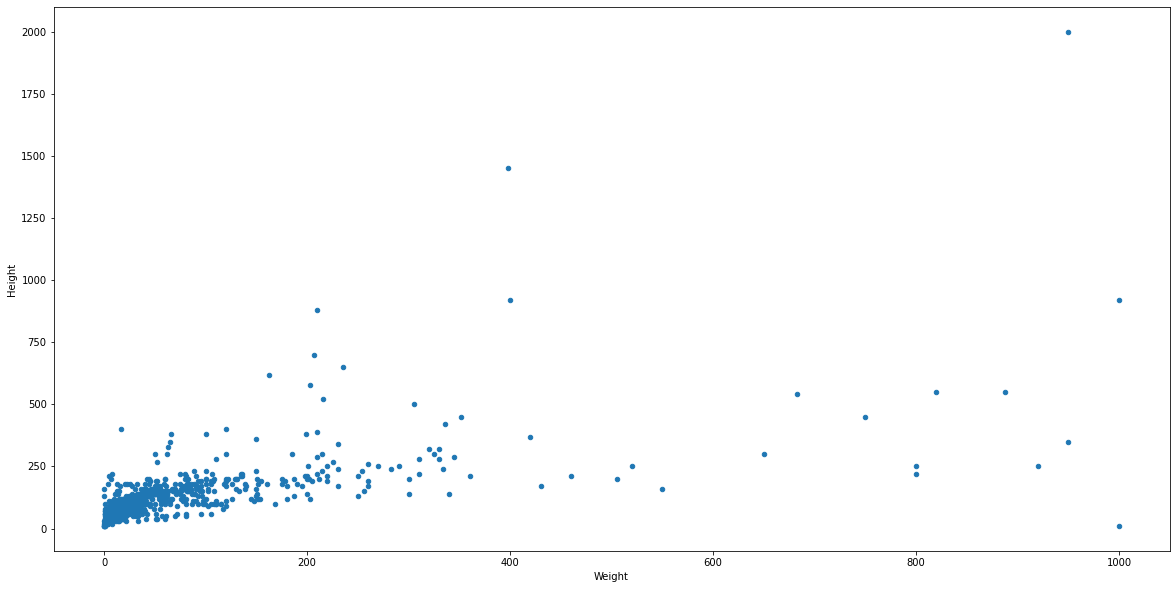

In [15]:
Pokemoni_Normal.plot.scatter(x="Weight", y="Height", figsize=(20,10))

In [16]:
Pokemoni_Normal.groupby("Generation").mean()

,ID,HP,Attack,Defense,Speed,Attack Special,Defense Special,Height,Weight,Napad,Obramba,Skupaj
Generation,,,,,,,,,,,,
1,76.0,64.211921,72.913907,68.225166,69.125828,67.139073,66.086093,119.470199,45.953642,209.178808,198.523179,407.701987
2,201.5,70.980000,68.260000,69.690000,61.410000,64.500000,72.340000,116.300000,49.105000,194.170000,213.010000,407.180000
3,319.0,65.666667,73.111111,69.007407,61.614815,67.859259,66.466667,122.962963,67.077778,202.585185,201.140741,403.725926
4,440.0,73.102804,80.214953,75.205607,69.476636,73.280374,74.476636,113.364486,76.885047,222.971963,222.785047,445.757009
5,571.5,70.314103,81.358974,71.320513,66.839744,68.916667,67.006410,103.205128,52.402564,217.115385,208.641026,425.756410
6,685.5,68.916667,72.500000,75.083333,65.680556,72.541667,74.583333,106.805556,51.401389,210.722222,218.583333,429.305556
7,765.5,71.011364,85.227273,78.272727,66.056818,75.409091,74.113636,135.113636,109.210227,226.693182,223.397727,450.090909
8,854.0,71.224719,79.966292,72.842697,67.640449,71.382022,69.303371,139.550562,76.267416,218.988764,213.370787,432.359551


<AxesSubplot:xlabel='Generation'>

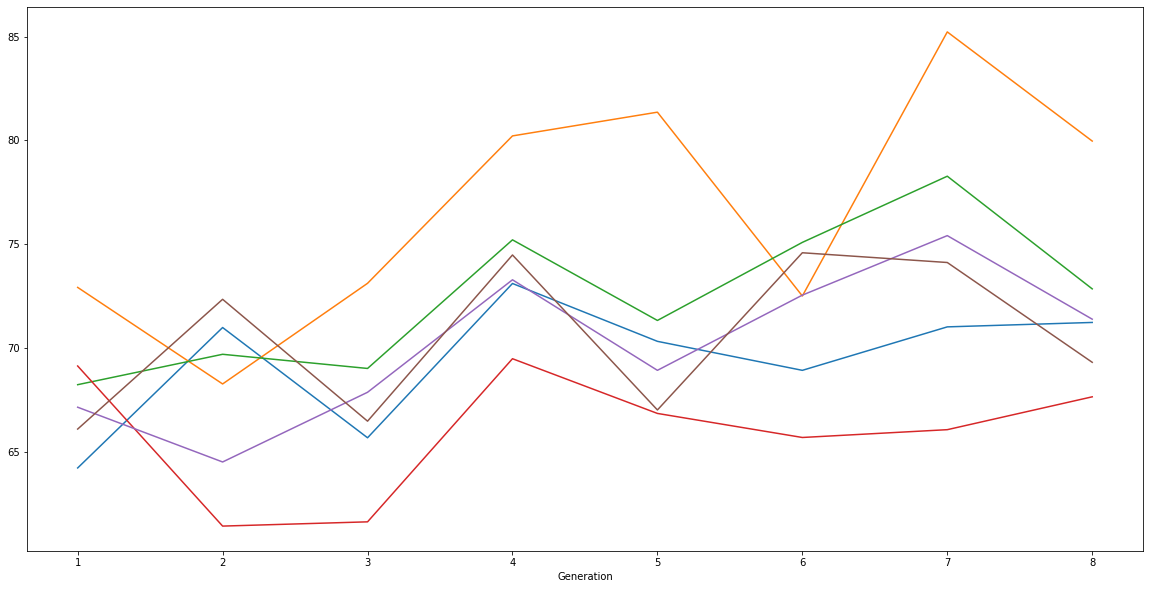

In [17]:
Pokemoni_Normal.groupby("Generation").mean()["HP"].plot(figsize=(20,10))
Pokemoni_Normal.groupby("Generation").mean()["Attack"].plot(figsize=(20,10))
Pokemoni_Normal.groupby("Generation").mean()["Defense"].plot(figsize=(20,10))
Pokemoni_Normal.groupby("Generation").mean()["Speed"].plot(figsize=(20,10))
Pokemoni_Normal.groupby("Generation").mean()["Attack Special"].plot(figsize=(20,10))
Pokemoni_Normal.groupby("Generation").mean()["Defense Special"].plot(figsize=(20,10))

Na zgornjem grafu lahko opazimo, kako so se lastnosti pokemonov spreminjale skozi generacije. Barve so sledeče:  
   * HP -> _modra_
   * Attack -> _oranžna_
   * Defense -> _zelena_
   * Speed -> _rdeča_
   * Attack Special -> _vijolična_
   * Defense Special -> _rjava_
   
   
Zanimivo je, da so pokemoni iz 7. generacije dobili izboljšave v vseh lastnostih, medtem ko so pokemoni iz generacije 5 v vsem slabši od prejšnje. Kar je presenetljivo je, da je ravno 7. generacija najmanj priljubljena med igralci pokemon iger. Mogoče pa več ni vedno boljše. Najbolj priljubljena - [Pokemon Platinum](https://bulbapedia.bulbagarden.net/wiki/Pok%C3%A9mon_Platinum_Version) - ki je bila izdana v generaciji 4 se pa izkaže za najbolj popularno. Glede na graf lahko razberemo, da so bile takrat vrednosti vseh lastnosti nekje na sredini. Za prihodnje generacije ne pričakujem prevelikih sprememb, saj se veliko pokemonov "prenese" v naslednje igre, in bi bili ali tako preslabi za igro ali pa bi jih rabili drastično spremeniti. Glede na graf zgleda, da so bile v začetnih letih spremembe bolj naključne,  v prihodnjih pa so le te bolj zvezne - ali vse gor ali pa vse dol. To bi lahko bila posledica eksperimentiranja v začetnih letih igre, ko ustvarjalci še niso vedeli, v katero smer želijo s to igro nadaljevati. 

In [18]:
Pokemoni_Normal.sort_values(["Speed", "Attack", "Attack Special"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
290,213,Shuckle,Bug,Rock,20,10,230,5,10,230,Sturdy,Gluttony,Contrary,2,60.0,20.5,25,480,505
941,771,Pyukumuku,Water,NaN,55,60,130,5,30,130,Innards Out,NaN,Unaware,7,30.0,1.2,95,315,410
560,446,Munchlax,Normal,NaN,135,85,40,5,40,85,Pickup,Thick Fat,Gluttony,4,60.0,105.0,130,260,390
1031,829,Gossifleur,Grass,NaN,40,40,60,10,40,60,Cotton Down,Regenerator,Effect Spore,8,40.0,2.2,90,160,250
729,597,Ferroseed,Grass,Steel,44,50,91,10,24,86,Iron Barbs,NaN,NaN,5,60.0,18.8,84,221,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,101,Electrode,Electric,NaN,60,50,70,150,80,80,Soundproof,Static,Aftermath,1,120.0,66.6,280,210,490
492,386,Deoxys,Psychic,NaN,50,150,50,150,150,50,Pressure,NaN,NaN,3,170.0,60.8,450,150,600
987,795,Pheromosa,Bug,Fighting,71,137,37,151,137,37,Beast Boost,NaN,NaN,7,180.0,25.0,425,145,570
378,291,Ninjask,Bug,Flying,61,90,45,160,50,50,Speed Boost,NaN,Infiltrator,3,80.0,12.0,300,156,456


In [19]:
Pokemoni_Normal.sort_values(["HP", "Defense", "Defense Special"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
379,292,Shedinja,Bug,Ghost,1,90,45,40,30,30,Wonder Guard,NaN,NaN,3,80.0,1.2,160,76,236
82,50,Diglett,Ground,NaN,10,55,25,95,35,45,Sand Veil,Arena Trap,Sand Force,1,20.0,0.8,185,80,265
244,172,Pichu,Electric,NaN,20,40,15,60,35,35,Static,NaN,Lightning Rod,2,30.0,2.0,135,70,205
444,349,Feebas,Water,NaN,20,15,20,80,10,55,Swift Swim,Oblivious,Adaptability,3,60.0,7.4,105,95,200
552,439,Mime Jr.,Psychic,Fairy,20,25,45,60,70,90,Soundproof,Filter,Technician,4,60.0,13.0,155,155,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,202,Wobbuffet,Psychic,NaN,190,33,58,33,33,58,Shadow Tag,NaN,Telepathy,2,130.0,28.5,99,306,405
1123,895,Regidrago,Dragon,NaN,200,100,50,80,100,50,Dragon's Maw,NaN,NaN,8,210.0,200.0,280,300,580
991,799,Guzzlord,Dark,Dragon,223,101,53,43,97,53,Beast Boost,NaN,NaN,7,550.0,888.0,241,329,570
171,113,Chansey,Normal,NaN,250,5,5,50,35,105,Natural Cure,Serene Grace,Healer,1,110.0,34.6,90,360,450


Najprej bi si rad pogledal, ali obstaja zveza, ki bi vrsto pokemona naredila zelo napadalnega (Attack + Speed + Attack Special) ali pa zveza za zelo obrambnega (Defense + HP + Defense Special). Za zečetek bi rad rekel, da so pri dnu obeh tabel legendarni - [Legendary](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon), ki imajo v povprečju višje skupno število točk - okoli 600, medtem ko je ta številka pri navadnih malce nižja. Zato bom v naslednjih tabelah le te izpustil, saj bi rad prišel do ugotovitev najboljših pokemonov, ki jih lahko skoraj vsak ujame brez posebnega truda. Omejil se bom na pokemone, ki imajo manj kot 550 skupnih točk.

In [20]:
Brez_Legendary=Pokemoni_Normal[Pokemoni_Normal["Skupaj"] < 550]

In [21]:
Brez_Legendary.sort_values(["HP", "Defense", "Defense Special"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
379,292,Shedinja,Bug,Ghost,1,90,45,40,30,30,Wonder Guard,NaN,NaN,3,80.0,1.2,160,76,236
82,50,Diglett,Ground,NaN,10,55,25,95,35,45,Sand Veil,Arena Trap,Sand Force,1,20.0,0.8,185,80,265
244,172,Pichu,Electric,NaN,20,40,15,60,35,35,Static,NaN,Lightning Rod,2,30.0,2.0,135,70,205
444,349,Feebas,Water,NaN,20,15,20,80,10,55,Swift Swim,Oblivious,Adaptability,3,60.0,7.4,105,95,200
552,439,Mime Jr.,Psychic,Fairy,20,25,45,60,70,90,Soundproof,Filter,Technician,4,60.0,13.0,155,155,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,594,Alomomola,Water,NaN,165,75,80,65,40,45,Healer,Hydration,Regenerator,5,120.0,31.6,180,290,470
414,321,Wailord,Water,NaN,170,90,45,60,90,45,Water Veil,Oblivious,Pressure,3,1450.0,398.0,240,260,500
277,202,Wobbuffet,Psychic,NaN,190,33,58,33,33,58,Shadow Tag,NaN,Telepathy,2,130.0,28.5,99,306,405
171,113,Chansey,Normal,NaN,250,5,5,50,35,105,Natural Cure,Serene Grace,Healer,1,110.0,34.6,90,360,450


In [22]:
Brez_Legendary.sort_values(["Defense", "Defense Special"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
553,440,Happiny,Normal,NaN,100,5,5,30,15,65,Natural Cure,Serene Grace,Friend Guard,4,60.0,24.4,50,170,220
171,113,Chansey,Normal,NaN,250,5,5,50,35,105,Natural Cure,Serene Grace,Healer,1,110.0,34.6,90,360,450
322,242,Blissey,Normal,NaN,255,10,10,55,75,135,Natural Cure,Serene Grace,Healer,2,150.0,46.8,140,400,540
247,174,Igglybuff,Normal,Fairy,90,30,15,15,40,20,Cute Charm,Competitive,Friend Guard,2,30.0,1.0,85,125,210
244,172,Pichu,Electric,NaN,20,40,15,60,35,35,Static,NaN,Lightning Rod,2,30.0,2.0,135,70,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,91,Cloyster,Water,Ice,50,95,180,70,85,45,Shell Armor,Skill Link,Overcoat,1,150.0,132.5,250,275,525
395,306,Aggron,Steel,Rock,70,110,180,50,60,60,Sturdy,Rock Head,Heavy Metal,3,210.0,360.0,220,310,530
866,713,Avalugg,Ice,NaN,95,117,184,28,44,46,Own Tempo,Ice Body,Sturdy,6,200.0,505.0,189,325,514
283,208,Steelix,Steel,Ground,75,85,200,30,55,65,Rock Head,Sturdy,Sheer Force,2,920.0,400.0,170,340,510


In [23]:
Brez_Legendary.sort_values(["Speed", "Attack", "Attack Special"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
290,213,Shuckle,Bug,Rock,20,10,230,5,10,230,Sturdy,Gluttony,Contrary,2,60.0,20.5,25,480,505
941,771,Pyukumuku,Water,NaN,55,60,130,5,30,130,Innards Out,NaN,Unaware,7,30.0,1.2,95,315,410
560,446,Munchlax,Normal,NaN,135,85,40,5,40,85,Pickup,Thick Fat,Gluttony,4,60.0,105.0,130,260,390
1031,829,Gossifleur,Grass,NaN,40,40,60,10,40,60,Cotton Down,Regenerator,Effect Spore,8,40.0,2.2,90,160,250
729,597,Ferroseed,Grass,Steel,44,50,91,10,24,86,Iron Barbs,NaN,NaN,5,60.0,18.8,84,221,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,142,Aerodactyl,Rock,Flying,80,105,65,130,60,75,Rock Head,Pressure,Unnerve,1,180.0,59.0,295,220,515
1055,847,Barraskewda,Water,NaN,61,123,60,136,60,50,Swift Swim,NaN,Propeller Tail,8,130.0,30.0,319,171,490
749,617,Accelgor,Bug,NaN,80,70,40,145,100,60,Hydration,Sticky Hold,Unburden,5,80.0,25.3,315,180,495
155,101,Electrode,Electric,NaN,60,50,70,150,80,80,Soundproof,Static,Aftermath,1,120.0,66.6,280,210,490


In [24]:
Brez_Legendary.sort_values(["Attack", "Attack Special"])

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
553,440,Happiny,Normal,NaN,100,5,5,30,15,65,Natural Cure,Serene Grace,Friend Guard,4,60.0,24.4,50,170,220
171,113,Chansey,Normal,NaN,250,5,5,50,35,105,Natural Cure,Serene Grace,Healer,1,110.0,34.6,90,360,450
290,213,Shuckle,Bug,Rock,20,10,230,5,10,230,Sturdy,Gluttony,Contrary,2,60.0,20.5,25,480,505
190,129,Magikarp,Water,NaN,20,10,55,80,15,20,Swift Swim,NaN,Rattled,1,90.0,10.0,105,95,200
322,242,Blissey,Normal,NaN,255,10,10,55,75,135,Natural Cure,Serene Grace,Healer,2,150.0,46.8,140,400,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,555,Darmanitan,Fire,NaN,105,140,55,95,30,55,Sheer Force,NaN,Zen Mode,5,130.0,92.9,265,215,480
580,464,Rhyperior,Ground,Rock,115,140,130,40,55,55,Lightning Rod,Solid Rock,Reckless,4,240.0,282.8,235,300,535
660,534,Conkeldurr,Fighting,NaN,105,140,95,45,55,65,Guts,Sheer Force,Iron Fist,5,140.0,87.0,240,265,505
744,612,Haxorus,Dragon,NaN,76,147,90,97,60,70,Rivalry,Mold Breaker,Unnerve,5,180.0,105.5,304,236,540


Za hitre napadalce bi tudi sam rekel, da se bodo tu znašli Electric / Bug / Flying pokemoni, saj je verjetno prva stvar, na katero pomisliš ko slišiš te besede hitrost. Seveda, če bi zamenjal vrstni red bi bili na vrhu drugi pokemoni, a sam menim da je hitrost pomembnejša, saj lahko z potezami in stvarmi - Items - nadoknadiš manjkajoč napad. Med najbolj napadalnimi pa me preseneča Rock tip, saj bi si mislil, da so pokemoni tipa Rock počasni, vendar vzdržljivi. Seveda pa se pojavi pričakovan tip Fighting, kjer že ime pove, v katerih lastnostih bo dominiral. Zelo pa me je presenetilo, da imata največ HP-ja dva Normal pokemona - sam bi si mislil, da bo to mesto zavzel Rock / Ground, vendar na spodnjem grafu vidim, da sta ta dva tipa dobra v obrambi - Defense, ne pa v HP. Vseeno sem imel drugačne predstave o tipu Normal, saj se mi je vedno zdel, kot da v igri ne igra posebne vloge. Če pogledamo le Defense in Defense Special, pa je zgodba kot sem jo pričakoval. Najbolj obrambni so tisti, kot bi si človek mislil - Rock / Ground, kar upam da bo razvidno tudi v prihodnjem grafu. Ta statisktika v igrah ni ravno eksaktna, saj pokemon v igri dobi lahko +/- nekaj točk, le te pa lahko tudi izboljšaš z bojevanjem določenih pokemonov.

# Primerjava med tipi pokemonov


## Začetni tipi


V tem razdelku si bom ogledal razlike med tremi začtenimi tipi v pokemon igrah. Za začetek bodo ti tipi le Fire, Grass in Water, ki so tako rekoč začetni pokemoni - Starterji. Na začetku vsake igre imaš na voljo izbrati enega iz vsakega tipa. Ti trije tipi delujejo na način igre kamen, škarje, papir, kjer Grass premaga Water, Water premaga Fire in Fire premaga Grass. Seveda se v kasnejših delih igre ta sistem spremeni v bolj kompleksnega, saj lahko pokemona naučimo veliko potez, tudi take ki niso njegovega tipa.

Če bi moral predvidevati, v katerih področjih so določeni tipi boljši od drugih, bi sklepal, da so nahitrejši tipi Electric / Flying, najbolj obrambni Rock / Ground / Steel, najbolj napadalni pa Fire / Fighting.

In [25]:
Grass = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Grass") | (Pokemoni_Normal["Type 2"] == "Grass")]

In [26]:
Water = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Water") | (Pokemoni_Normal["Type 2"] == "Water")]

In [27]:
Fire = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Fire") | (Pokemoni_Normal["Type 2"] == "Fire")]

In [28]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Grass") & (Pokemoni_Normal["Type 2"] == "Water")|
    (Pokemoni_Normal["Type 1"] == "Water") & (Pokemoni_Normal["Type 2"] == "Grass")
]["ID"].count()

3

In [29]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Grass") & (Pokemoni_Normal["Type 2"] == "Fire")|
    (Pokemoni_Normal["Type 1"] == "Fire") & (Pokemoni_Normal["Type 2"] == "Grass")
]["ID"].count()

0

In [30]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Water") & (Pokemoni_Normal["Type 2"] == "Fire")|
    (Pokemoni_Normal["Type 1"] == "Fire") & (Pokemoni_Normal["Type 2"] == "Water")
]["ID"].count()

1

In [31]:
Grass

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
0,1,Bulbasaur,Grass,Poison,45,49,49,45,65,65,Overgrow,NaN,Chlorophyll,1,70.0,6.9,159,159,318
1,2,Ivysaur,Grass,Poison,60,62,63,60,80,80,Overgrow,NaN,Chlorophyll,1,100.0,13.0,202,203,405
2,3,Venusaur,Grass,Poison,80,82,83,80,100,100,Overgrow,NaN,Chlorophyll,1,200.0,100.0,262,263,525
75,43,Oddish,Grass,Poison,45,50,55,30,75,65,Chlorophyll,NaN,Run Away,1,50.0,5.4,155,165,320
76,44,Gloom,Grass,Poison,60,65,70,40,85,75,Chlorophyll,NaN,Stench,1,80.0,8.6,190,205,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,840,Applin,Grass,Dragon,40,40,80,20,40,40,Ripen,Gluttony,Bulletproof,8,20.0,0.5,100,160,260
1045,841,Flapple,Grass,Dragon,70,110,80,70,95,60,Ripen,Gluttony,Hustle,8,30.0,1.0,275,210,485
1047,842,Appletun,Grass,Dragon,110,85,80,30,100,80,Ripen,Gluttony,Thick Fat,8,40.0,13.0,215,270,485
1120,893,Zarude,Dark,Grass,105,120,105,105,70,95,Leaf Guard,NaN,NaN,8,180.0,70.0,295,305,600


In [32]:
Water

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
11,7,Squirtle,Water,NaN,44,48,65,43,50,64,Torrent,NaN,Rain Dish,1,50.0,9.0,141,173,314
12,8,Wartortle,Water,NaN,59,63,80,58,65,80,Torrent,NaN,Rain Dish,1,100.0,22.5,186,219,405
13,9,Blastoise,Water,NaN,79,83,100,78,85,105,Torrent,NaN,Rain Dish,1,160.0,85.5,246,284,530
92,54,Psyduck,Water,NaN,50,52,48,55,65,50,Damp,Cloud Nine,Swift Swim,1,80.0,19.6,172,148,320
93,55,Golduck,Water,NaN,80,82,78,85,95,80,Damp,Cloud Nine,Swift Swim,1,170.0,76.6,262,238,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,845,Cramorant,Flying,Water,70,85,55,85,85,95,Gulp Missile,NaN,NaN,8,80.0,18.0,255,220,475
1054,846,Arrokuda,Water,NaN,41,63,40,66,40,30,Swift Swim,NaN,Propeller Tail,8,50.0,1.0,169,111,280
1055,847,Barraskewda,Water,NaN,61,123,60,136,60,50,Swift Swim,NaN,Propeller Tail,8,130.0,30.0,319,171,490
1102,882,Dracovish,Water,Dragon,90,90,100,75,70,80,Water Absorb,Strong Jaw,Sand Rush,8,230.0,215.0,235,270,505


In [33]:
Fire

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
5,4,Charmander,Fire,NaN,39,52,43,65,60,50,Blaze,NaN,Solar Power,1,60.0,8.5,177,132,309
6,5,Charmeleon,Fire,NaN,58,64,58,80,80,65,Blaze,NaN,Solar Power,1,110.0,19.0,224,181,405
7,6,Charizard,Fire,Flying,78,84,78,100,109,85,Blaze,NaN,Solar Power,1,170.0,90.5,293,241,534
67,37,Vulpix,Fire,NaN,38,41,40,65,50,65,Flash Fire,NaN,Drought,1,60.0,9.9,156,143,299
69,38,Ninetales,Fire,NaN,73,76,75,100,81,100,Flash Fire,NaN,Drought,1,110.0,19.9,257,248,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,815,Cinderace,Fire,NaN,80,116,75,119,65,75,Blaze,NaN,Libero,8,140.0,33.0,300,230,530
1041,838,Carkol,Rock,Fire,80,60,90,50,60,70,Steam Engine,Flame Body,Flash Fire,8,110.0,78.0,170,240,410
1042,839,Coalossal,Rock,Fire,110,80,120,30,80,90,Steam Engine,Flame Body,Flash Fire,8,280.0,310.5,190,320,510
1061,850,Sizzlipede,Fire,Bug,50,65,45,45,50,50,Flash Fire,White Smoke,Flame Body,8,70.0,1.0,160,145,305


Opazimo lahko, da je največ pokemonov tipa Water, kar 141 - to me ne preseneča niti najmanj, saj lahko največ inspiracije potegnemo iz vodnih živali. Najmanj pa je ognjenih - le 71. Zanimivo je, da obstajajo le trije pokemoni tipa Grass/Water. Sam bi pričakoval več pokemonov te mešanice, saj se v naravi ponuja veliko živali ki so dvoživke - vendar zgleda da so te raje porazporedili po drugih tipih. Sem pa presenečen da obstaja le en pokemon tipa Fire/Water in pa nobenega, ki bi bil tipa Grass/Fire. Prvega od teh dveh sam ne bi pričakov, saj se zdi ta kombinacije zelo neintuitivna.

In [75]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Water") & (Pokemoni_Normal["Type 2"] == "Fire")|
    (Pokemoni_Normal["Type 1"] == "Fire") & (Pokemoni_Normal["Type 2"] == "Water")
]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
879,721,Volcanion,Fire,Water,80,110,120,70,130,90,Water Absorb,NaN,NaN,6,170.0,195.0,310,290,600


In [34]:
index = ["HP", "Attack", "Defense", "Speed", "Attack Special", "Defense Special"]

In [35]:
Grass_Type = [
    Grass["HP"].mean(), Grass["Attack"].mean(), Grass["Defense"].mean(),
    Grass["Speed"].mean(), Grass["Attack Special"].mean(), Grass["Defense Special"].mean()
]

In [36]:
Water_Type = [
    Water["HP"].mean(), Water["Attack"].mean(), Water["Defense"].mean(),
    Water["Speed"].mean(), Water["Attack Special"].mean(), Water["Defense Special"].mean()
]

In [37]:
Fire_Type = [Fire["HP"].mean(), Fire["Attack"].mean(), Fire["Defense"].mean(),
             Fire["Speed"].mean(), Fire["Attack Special"].mean(), Fire["Defense Special"].mean()
            ]

In [38]:
Starter_Types = pd.DataFrame({"Grass": Grass_Type, "Water":Water_Type, "Fire":Fire_Type}, index=index)

<AxesSubplot:>

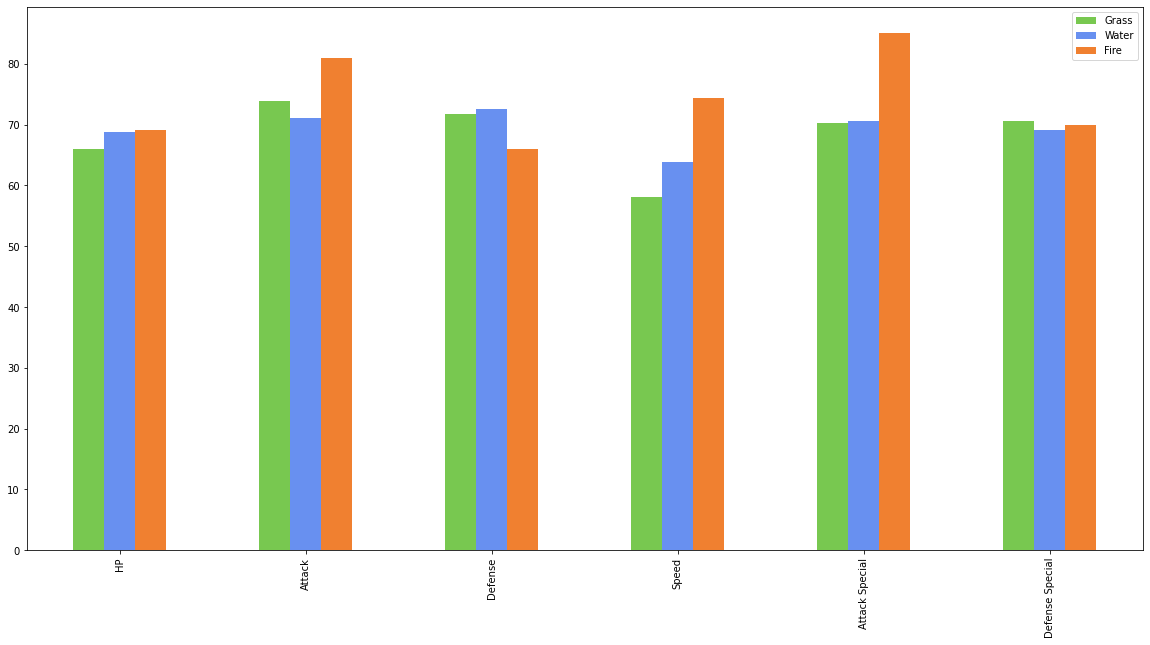

In [39]:
Starter_Types.plot.bar(color={"Grass": "#78c850", "Water": "#6890f0", "Fire": "#f08030"}, figsize=(20,10))

V tabeli lahko vidimo, v katerih lastnostih so določeni tipi pokemonov boljši od drugih. Ognjeni tipi na prvi pogled izgledajo bolj napadalni in hitrejši, vendar so slabši pri obrambnih lastnostih. Travnati pokemoni so najpočasnejši izmed treh, vendar imajo dobro obrambo in še kar dober napad. Vodni pokemoni pa se zdijo najbolj uravnoteženi izmed vseh treh - nikjer ne blestijo, a zaradi tega niso nikjer prikrajšani. Če bi bili to edini tipi v igri, bi človek rekel, da so ognjeni najboljši, saj so boljši v večini lastnosti, vendar ne smemo pozabiti, da vodni pokemoni premagajo ognjene, medtem ko so ognjeni šibki proti vodnim. Zdi se, da je zaenkrat najmočnejši tip Water.

## Ostali Tipi pokemonov

In [40]:
Bug = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Bug") | (Pokemoni_Normal["Type 2"] == "Bug")]

In [41]:
Bug_Type = [
    Bug["HP"].mean(), Bug["Attack"].mean(), Bug["Defense"].mean(),
    Bug["Speed"].mean(), Bug["Attack Special"].mean(), Bug["Defense Special"].mean()
]

In [42]:
Dragon = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Dragon") | (Pokemoni_Normal["Type 2"] == "Dragon")]

In [43]:
Dragon_Type = [
    Dragon["HP"].mean(), Dragon["Attack"].mean(), Dragon["Defense"].mean(),
    Dragon["Speed"].mean(), Dragon["Attack Special"].mean(), Dragon["Defense Special"].mean()
]

In [44]:
Fairy = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Fairy") | (Pokemoni_Normal["Type 2"] == "Fairy")]

In [45]:
Fairy_Type = [
    Fairy["HP"].mean(), Fairy["Attack"].mean(), Fairy["Defense"].mean(),
    Fairy["Speed"].mean(), Fairy["Attack Special"].mean(), Fairy["Defense Special"].mean()
]

In [46]:
Ghost = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Ghost") | (Pokemoni_Normal["Type 2"] == "Ghost")]

In [47]:
Ghost_Type = [
    Ghost["HP"].mean(), Ghost["Attack"].mean(), Ghost["Defense"].mean(),
    Ghost["Speed"].mean(), Ghost["Attack Special"].mean(), Ghost["Defense Special"].mean()
]

In [48]:
Ground = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Ground") | (Pokemoni_Normal["Type 2"] == "Ground")]

In [49]:
Ground_Type = [
    Ground["HP"].mean(), Ground["Attack"].mean(), Ground["Defense"].mean(),
    Ground["Speed"].mean(), Ground["Attack Special"].mean(), Ground["Defense Special"].mean()
]

In [50]:
Normal = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Normal") | (Pokemoni_Normal["Type 2"] == "Normal")]

In [51]:
Normal_Type = [
    Normal["HP"].mean(), Normal["Attack"].mean(), Normal["Defense"].mean(),
    Normal["Speed"].mean(), Normal["Attack Special"].mean(), Normal["Defense Special"].mean()
]

In [52]:
Psychic = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Psychic") | (Pokemoni_Normal["Type 2"] == "Psychic")]

In [53]:
Psychic_Type = [
    Psychic["HP"].mean(), Psychic["Attack"].mean(), Psychic["Defense"].mean(),
    Psychic["Speed"].mean(), Psychic["Attack Special"].mean(), Psychic["Defense Special"].mean()
]

In [54]:
Steel = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Steel") | (Pokemoni_Normal["Type 2"] == "Steel")]

In [55]:
Steel_Type = [
    Steel["HP"].mean(), Steel["Attack"].mean(), Steel["Defense"].mean(),
    Steel["Speed"].mean(), Steel["Attack Special"].mean(), Steel["Defense Special"].mean()
]

In [56]:
Dark = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Dark") | (Pokemoni_Normal["Type 2"] == "Dark")]

In [57]:
Dark_Type = [
    Dark["HP"].mean(), Dark["Attack"].mean(), Dark["Defense"].mean(),
    Dark["Speed"].mean(), Dark["Attack Special"].mean(), Dark["Defense Special"].mean()
]

In [58]:
Electric = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Electric") | (Pokemoni_Normal["Type 2"] == "Electric")]

In [59]:
Electric_Type = [
    Electric["HP"].mean(), Electric["Attack"].mean(), Electric["Defense"].mean(),
    Electric["Speed"].mean(), Electric["Attack Special"].mean(), Electric["Defense Special"].mean()
]

In [60]:
Fighting = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Fighting") | (Pokemoni_Normal["Type 2"] == "Fighting")]

In [61]:
Fighting_Type = [
    Fighting["HP"].mean(), Fighting["Attack"].mean(), Fighting["Defense"].mean(),
    Fighting["Speed"].mean(), Fighting["Attack Special"].mean(), Fighting["Defense Special"].mean()
]

In [62]:
Flying = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Flying") | (Pokemoni_Normal["Type 2"] == "Flying")]

In [63]:
Flying_Type = [
    Flying["HP"].mean(), Flying["Attack"].mean(), Flying["Defense"].mean(),
    Flying["Speed"].mean(), Flying["Attack Special"].mean(), Flying["Defense Special"].mean()
]

In [64]:
Ice = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Ice") | (Pokemoni_Normal["Type 2"] == "Ice")]

In [65]:
Ice_Type = [
    Ice["HP"].mean(), Ice["Attack"].mean(), Ice["Defense"].mean(),
    Ice["Speed"].mean(), Ice["Attack Special"].mean(), Ice["Defense Special"].mean()
]

In [66]:
Poison = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Poison") | (Pokemoni_Normal["Type 2"] == "Poison")]

In [67]:
Poison_Type = [
    Poison["HP"].mean(), Poison["Attack"].mean(), Poison["Defense"].mean(),
    Poison["Speed"].mean(), Poison["Attack Special"].mean(), Poison["Defense Special"].mean()
]

In [68]:
Rock = Pokemoni_Normal[(Pokemoni_Normal["Type 1"] == "Rock") | (Pokemoni_Normal["Type 2"] == "Rock")]

In [69]:
Rock_Type = [
    Rock["HP"].mean(), Rock["Attack"].mean(), Rock["Defense"].mean(),
    Rock["Speed"].mean(), Rock["Attack Special"].mean(), Rock["Defense Special"].mean()
]

In [70]:
All_Types = pd.DataFrame({
    "Bug": Bug_Type, "Dragon": Dragon_Type, "Fairy": Fairy_Type, "Fire": Fire_Type, "Ghost": Ghost_Type, "Ground": Ground_Type,
    "Normal": Normal_Type, "Psychic": Psychic_Type, "Steel": Steel_Type, "Dark": Dark_Type, "Electric": Electric_Type,
    "Fighting": Fighting_Type, "Flying": Flying_Type, "Grass": Grass_Type, "Ice": Ice_Type, "Poison": Poison_Type,
    "Rock": Rock_Type, "Water": Water_Type
}, index=index)

<AxesSubplot:>

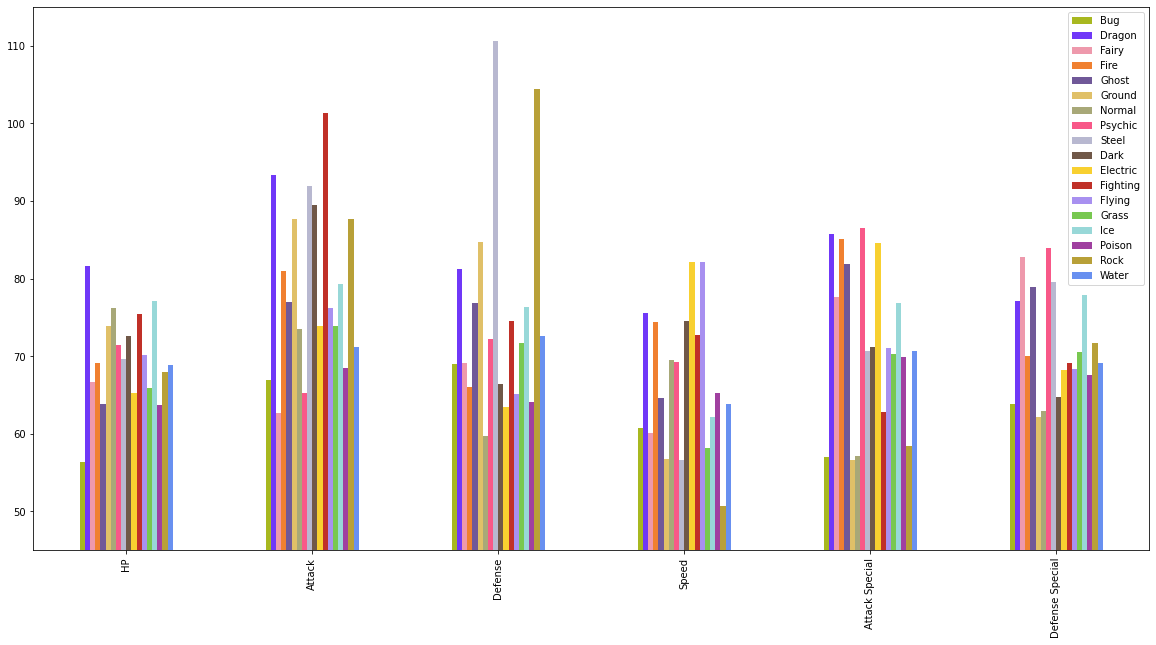

In [71]:
All_Types.plot.bar(ylim=(45,115), figsize=(20,10),
    color={
        "Bug": "#a8b820", "Dragon": "#7038f8", "Fairy": "#ee99ac", "Fire": "#f08030", "Ghost": "#705898", "Ground": "#e0c068",
        "Normal": "#a8a878", "Psychic": "#f85888", "Steel": "#b8b8d0", "Dark": "#705848", "Electric": "#f8d030",
        "Fighting": "#c03028", "Flying": "#a890f0", "Grass": "#78c850", "Ice": "#98d8d8", "Poison": "#a040a0",
        "Rock": "#b8a038", "Water": "#6890f0"
    }
)

V tem delu bom upošteval nekaj statistike iz interneta, ki je nisem zbral v seminarski nalogi, ampak je ključnega pomena pri določanju najboljšega tipa pokemona. To bo ![pokemon type chart](https://img.pokemondb.net/images/typechart.png "Pokemon Type Chart") Tukaj je navedeno proti katerim pokemonom bo naš izbrani tip bolj učinkovit in proti katerim manj. Če za primer vzamemo pokemona tipa Normal/Flying, pomeni, da bo bolj učinkovit proti Grass, Fighting, Bug (2-krat), slabo bo učinkovit proti Electric (1/2-krat), zelo slabo proti Rock in Steel (1/4-krat), nič pa ne bo mogel proti Ghost pokemonom (0-krat). Hkrati pa mu nič ne morejo Ghost in Ground pokemoni (0-krat), slabi so Grass in Bug (1/2-krat), dobri pa so Electric, Ice, Rock (2-krat). Iz tega je razvidno, da je kombinacija Normal/Flying slaba proti Electric, saj je manj učinkovita, hkrati pa slabša v obrambnem smislu, zelo dobra pa je proti pokemonom tipa Grass in Bug iz istega razmisleka.

In [72]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Flying") & (Pokemoni_Normal["Type 2"] == "Normal")|
    (Pokemoni_Normal["Type 1"] == "Normal") & (Pokemoni_Normal["Type 2"] == "Flying")
]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
24,16,Pidgey,Normal,Flying,40,45,40,65,35,35,Keen Eye,Tangled Feet,Big Pecks,1,30.0,1.8,145,115,260
25,17,Pidgeotto,Normal,Flying,63,60,55,71,50,50,Keen Eye,Tangled Feet,Big Pecks,1,110.0,30.0,181,168,349
26,18,Pidgeot,Normal,Flying,83,80,75,101,70,70,Keen Eye,Tangled Feet,Big Pecks,1,150.0,39.5,251,228,479
32,21,Spearow,Normal,Flying,40,60,30,70,31,31,Keen Eye,NaN,Sniper,1,30.0,2.0,161,101,262
33,22,Fearow,Normal,Flying,65,90,65,100,61,61,Keen Eye,NaN,Sniper,1,120.0,38.0,251,191,442
131,83,Farfetch’d,Normal,Flying,52,90,55,60,58,62,Keen Eye,Inner Focus,Defiant,1,80.0,15.0,208,169,377
133,84,Doduo,Normal,Flying,35,85,45,75,35,35,Run Away,Early Bird,Tangled Feet,1,140.0,39.2,195,115,310
134,85,Dodrio,Normal,Flying,60,110,70,110,60,60,Run Away,Early Bird,Tangled Feet,1,180.0,85.2,280,190,470
235,163,Hoothoot,Normal,Flying,60,30,30,50,36,56,Insomnia,Keen Eye,Tinted Lens,2,70.0,21.2,116,146,262
236,164,Noctowl,Normal,Flying,100,50,50,70,86,96,Insomnia,Keen Eye,Tinted Lens,2,160.0,40.8,206,246,452


Torej da bo tip čim bolj učinkovit mora imeti poleg visokega povrpečja lastnosti tudi malo tipov, proti katerim ni učinkovit. Prvi tip ki bode v oči je tip Dragon - v vseh lastnostih ima nadpovprečno število, če pa pogledamo sliko pa lahko opazimo, da mu marsikateri tip ne more veliko. Edini pravi nasprotnik so mu Fairy pokemoni, vendar 1/18 ni zelo huda nevarnost, še posebej če imamo v ekipi lahko še 5 pokemonov. Naslednji tip ki mi pade v oko iz tabele pa je tip Steel. Ne le, da je v povprečju najboljši obrambni pokemon, proti večini pokemonov je celo odporen (1/2-krat). Skupno gledano pa sem presenečen, da so zelo bili ustvarjalci zelo uspešni pri uravnotežanju tipov pokemonov. Skoraj vsakega lahko najdemo pri določeni lastnosti proti vrhu in pri drugi bolj pri dnu. Seveda so nekateri tipi večkrat pri vrhu kot pa pri dnu in so ravno zaradi tega med bolj uporabnimi. Najmanj obetavno se kaže Bug pokemonom, ki so povsod podpovprečni, v tabeli pa mu tude ne kaže precej dobro. Zdi se, da torej imamo odgovor (vsaj na papirju). Najboljši tip je tip Dragon, najslabši pa tip Bug. Kaj pa če kombiniramo? Pokemon ima lahko največ 2 tipa, torej če vzamemo najboljša dva, bo ta pokemon še močnejši. Problem je, da je takih verjetno zelo malo. Oglejmo si primer pokemonov tipa Dragon/Ice, ki glede na graf izgledajo zelo močni:

In [73]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Ice") & (Pokemoni_Normal["Type 2"] == "Dragon")|
    (Pokemoni_Normal["Type 1"] == "Dragon") & (Pokemoni_Normal["Type 2"] == "Ice")
]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj
782,646,Kyurem,Dragon,Ice,125,130,90,95,130,90,Pressure,NaN,NaN,5,300.0,325.0,355,305,660


Tak je namreč le eden, in še ta je legendaren, saj ima skupaj več kot 600 točk - 660 če sem natančen. Torej si s tem ne bomo pomagali, čeprav bi bilo lepo imeti ekipo le iz legendarnih. Če pogledamo, kateri pokemoni bi bili najbolj obrambni proti drugim bi lahko iz slike izbrali Steel/Dragon ali pa Steel/Poison, ker sta ti kombinaciji zelo dobro obrambno utrjeni. Seveda bi slednja kombinacija zelo trpela pri hitrosti, vendar pa sem pri prejšni ugotovitvi videl, da ne obstaja pokemon, ki bi bil dober za vse. Izkaže se celo, da pokemon tipa Steel/Poison sploh ne obstaja!

In [74]:
Pokemoni_Normal[
    (Pokemoni_Normal["Type 1"] == "Steel") & (Pokemoni_Normal["Type 2"] == "Poison")|
    (Pokemoni_Normal["Type 1"] == "Poison") & (Pokemoni_Normal["Type 2"] == "Steel")
]

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Attack Special,Defense Special,Ability 1,Ability 2,Hidden Ability,Generation,Height,Weight,Napad,Obramba,Skupaj


Za konec bi rekel, da so bile moje hipoteze napačne. Zdi se, da je najmočejši tip pokemona Dragon, vendar če vključujemo poteze in stvari - [Items](https://bulbapedia.bulbagarden.net/wiki/Item), ki jih lahko damo pokemonu je tu preveč kombinacij, da bi z mojo analizo do končno določil res najboljšega. Prav sem pa imel glede najslabšega. Zdelo se mi je da bo lažje najti najmanj koristi tip pokemona kot pa najbolj koristnega, vendar si nisem mislil da bo to Bug. Bolj sem pričakoval tip Ice, ki se je v igrah le redko pojavil, ponavadi šele proti koncu in se mi je vedno zdelo, kot da že imam nekoga na ekipi, ki igra podobno vlogo kot bi jo igral tip Ice. Seveda, če igraš tekmovalno, potrebuješ najboljšo ekipa kar jih je, vendar ker sam nisem tak, se ponavadi ne oziram preveč na statistiko in uporabljam tisto, kar mi je vseš.


Za analizo potez - moves pa sem ugotovil, da ne bi izvedel skoraj nič novega. Namreč vsi tipi potez imajo tako Pysical in Special poteze (Kontakne in brez-kontaktne), prav tako pa tudi poteze, ki so močne, poteze, ki so natančne ali pa poteze ki dodajo statusne effekte (recimo Thunder ima možnost paralizirati nasprotnika, Ember ga lahko zažge, ipd), hkrati pa lahko pokemona naučimo poteze, ki niso nujno njegovega tipa. Seveda vseh pokemonov ne moremo naučiti vsega, vendar je seznamov katere poteze lahko naučimo koga veliko in se tudi vsako generacijo spremenijo. Za boljši vploged skozi zgodovino competitive pokemonov predlagam YT kanal [False Swipe Gaming](https://www.youtube.com/channel/UCDGbmCxt2CEZAsDh1CiWXsQ), ki si za pokemona ogleda njegovo spreminjanje skozi generacije v pokemon turnerjih.